In [516]:
# packages
import pandas as pd
import numpy as  np

In [517]:
# import data, read file
client_data = pd.read_csv('dataset_mood_smartphone.csv')

In [518]:
client_data.id.nunique()
client_data.variable.unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [519]:
client_data[client_data['variable']== 'mood'].value.nunique()
client_data[client_data['variable']== 'activity'].value.unique()

array([0.07142857, 0.09166667, 0.00833333, ..., 0.17094017, 0.62096774,
       0.73109244])

In [520]:
client_data.head(5)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


# preprocessing

In [521]:
# task 2
client_data_new=pd.DataFrame(columns=['id', 'time', 'var',"value"])

temp_list=[]
prev_day='02-26'

for index, row in client_data.iterrows():
    
    date=row['time'].split(' ')[0]
    date=date.split('-')[1]+'-'+date.split('-')[2]
    
    if date != prev_day:
        client_data_new.loc[index]=[client_data.loc[index-1]['id'], prev_day , client_data.loc[index-1]['variable'], np.mean(temp_list)]
        temp_list=[row['value']]
    else:
        temp_list.append(row['value'])
    prev_day=date

In [522]:
# test = client_data_new['time'][0]
# test = test.split(' ')[0]
# test = test.split('-')[1]+'-'+test.split('-')[2]
# test

# prelimanary analyisis, correlation attributes
all atributes are numerical

In [523]:
client_data_new.head(5)

,id,time,var,value
4,AS14.01,02-26,mood,6.250000
7,AS14.01,02-27,mood,6.333333
12,AS14.01,03-21,mood,6.200000
17,AS14.01,03-22,mood,6.400000
22,AS14.01,03-23,mood,6.800000


In [524]:
# task 3, t=4 per row

temp = pd.DataFrame(client_data_new.values)
df = pd.concat([temp.shift(3), temp.shift(2), temp.shift(1), temp], axis=1)
df.columns = ['id-1','time1','var1','val1','id-2','time2','var2','val2','id-3','time3','var3','val3','id-4','time4','var4','val4']

# client_data is the main data set, df is for filtering out unmatching rows
client_data = df.loc[3:]
df = df.loc[3:]
# df_test = df


In [ ]:
# # task 3, t=5 per row

# temp = pd.DataFrame(client_data_new.values)
# df = pd.concat([temp.shift(4),temp.shift(3), temp.shift(2), temp.shift(1), temp], axis=1)
# df.columns = ['id-1','time1','var1','val1','id-2','time2','var2','val2','id-3','time3','var3','val3','id-4','time4','var4','val4']

# # client_data is the main data set, df is for filtering out unmatching rows
# client_data = df.loc[3:]
# df = df.loc[3:]
# # df_test = df


In [525]:
# filtering out variable and id that do not match per row
df['id_check'] = 0
df['var_check'] = 0

for i, row in df.iterrows():
    if (row['id-1']== row['id-2']) & (row['id-1']==row['id-3'])& (row['id-1']==row['id-4']):
        df.loc[i,'id_check'] = 1
    else:
        df.loc[i,'id_check'] = 0
    
    if (row['var1']== row['var2']) & (row['var1']==row['var3'])& (row['var1']==row['var4']):
        df.loc[i,'var_check'] = 1
    else:
        df.loc[i,'var_check'] = 0


In [526]:
# df['id_check'] = 0
# df['var_check'] = 0
# for index in range(len(df)):
#     if ((df.iloc[index]['id-1'] == df.iloc[index]['id-2']) & (df.iloc[index]['id-1'] == df.iloc[index]['id-3'])
#         &(df.iloc[index]['id-1'] == df.iloc[index]['id-4'])):
#         df.iloc[index]['id_check'] = 1
#     else:
#         df.iloc[index]['id_check'] = 0

        
# for index in range(len(df)):
#     if ((df.iloc[index]['var1'] == df.iloc[index]['var2']) & (df.iloc[index]['var1'] == df.iloc[index]['var3'])
#         &(df.iloc[index]['var1'] == df.iloc[index]['var4'])):
#         df.iloc[index]['var_check'] = 1
#     else:
#         df.iloc[index]['var_check'] = 0


# for index in range(len(df)):
#     if ((df.iloc[index]['var1'] == df.iloc[index]['var2']) & (df.iloc[index]['var1'] == df.iloc[index]['var3'])
#         &(df.iloc[index]['var1'] == df.iloc[index]['var4'])):
#         df['var_check'] = 1
#     else:
#         df['var_check'] = 0

In [527]:
# cleaning: removing rows that dont match id/var

#removing rows with different ID and variable
for i, row in df.iterrows():
    if row['id_check']==0 or row['var_check']==0:
        client_data=client_data.drop(i)
    
client_data=client_data.drop(['var2','var3','var4','id-2','id-3','id-4'], axis=1) 

print(df.shape)
print(client_data.shape)

(15515, 18)
(14188, 10)


In [528]:
columns_titles = ['id-1','var1','time1','val1','time2','val2','time3','val3','time4','val4']
client_data=client_data.reindex(columns=columns_titles)
client_data = client_data.reset_index()
client_data = client_data.drop(columns=['index'])

# make times into datetime, to calculate with it
client_data['time1'] = pd.to_datetime(client_data['time1'],format="%m-%d")
client_data['time2'] = pd.to_datetime(client_data['time2'],format="%m-%d")
client_data['time3'] = pd.to_datetime(client_data['time3'],format="%m-%d")
client_data['time4'] = pd.to_datetime(client_data['time4'],format="%m-%d")

In [529]:
client_data.head(3)

,id-1,var1,time1,val1,time2,val2,time3,val3,time4,val4
0,AS14.01,mood,1900-02-26,6.25,1900-02-27,6.33333,1900-03-21,6.2,1900-03-22,6.4
1,AS14.01,mood,1900-02-27,6.33333,1900-03-21,6.2,1900-03-22,6.4,1900-03-23,6.8
2,AS14.01,mood,1900-03-21,6.2,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6


In [530]:
# delta time step is 1 day --> timedelta(-1 days)

In [531]:
#check and remove rows where the days are not consecutives 

data_iter=client_data
for i, row in data_iter.iterrows():
    delta1=data_iter["time1"].iloc[i] - data_iter["time2"].iloc[i]
    delta2=data_iter["time2"].iloc[i] - data_iter["time3"].iloc[i]
    delta3=data_iter["time3"].iloc[i] - data_iter["time4"].iloc[i]
    
    delta1=delta1.days
    delta2=delta2.days
    delta3=delta3.days
    
    if delta1 != -1 or delta2 != -1 or delta3 != -1:
        client_data = client_data.drop(i)


In [532]:
client_data=client_data.reset_index()
client_data = client_data.drop(columns=["index"])
client_data

,id-1,var1,time1,val1,time2,val2,time3,val3,time4,val4
0,AS14.01,mood,1900-03-21,6.2,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6
1,AS14.01,mood,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6,1900-03-25,6.75
2,AS14.01,mood,1900-03-23,6.8,1900-03-24,6,1900-03-25,6.75,1900-03-26,6.6
3,AS14.01,mood,1900-03-24,6,1900-03-25,6.75,1900-03-26,6.6,1900-03-27,7
4,AS14.01,mood,1900-03-25,6.75,1900-03-26,6.6,1900-03-27,7,1900-03-28,6.4
5,AS14.01,mood,1900-03-26,6.6,1900-03-27,7,1900-03-28,6.4,1900-03-29,8
6,AS14.01,mood,1900-03-27,7,1900-03-28,6.4,1900-03-29,8,1900-03-30,7.5
7,AS14.01,mood,1900-03-28,6.4,1900-03-29,8,1900-03-30,7.5,1900-03-31,7.4
8,AS14.01,mood,1900-03-29,8,1900-03-30,7.5,1900-03-31,7.4,1900-04-01,6
9,AS14.01,mood,1900-03-30,7.5,1900-03-31,7.4,1900-04-01,6,1900-04-02,6.5


In [533]:
# client_data["val1"] = client_data["val1"].apply(pd.to_numeric, errors='coerce')
# client_data["val2"] = client_data["val2"].apply(pd.to_numeric, errors='coerce')
# client_data["val3"] = client_data["val3"].apply(pd.to_numeric, errors='coerce')
# client_data["val4"] = client_data["val4"].apply(pd.to_numeric, errors='coerce')

In [534]:
# these actions are part of the preliminary process
#add column with the average 
client_data['avg'] = client_data[['val1','val2', 'val3']].mean(axis=1)

# # add slope column
# slopes = []
# for i, row in client_data.iterrows():
#     a,b = np.polyfit([1,2,3],[row['val1'],row['val2'],row['val3']],1)
#     slopes.append(a)
# client_data['slope']=slopes

client_data.head()

,id-1,var1,time1,val1,time2,val2,time3,val3,time4,val4,avg
0,AS14.01,mood,1900-03-21,6.2,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6,6.466667
1,AS14.01,mood,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6,1900-03-25,6.75,6.400000
2,AS14.01,mood,1900-03-23,6.8,1900-03-24,6,1900-03-25,6.75,1900-03-26,6.6,6.516667
3,AS14.01,mood,1900-03-24,6,1900-03-25,6.75,1900-03-26,6.6,1900-03-27,7,6.450000
4,AS14.01,mood,1900-03-25,6.75,1900-03-26,6.6,1900-03-27,7,1900-03-28,6.4,6.783333


# analysis
client data or final_df

In [536]:
# settin the DF target value form
final_df = client_data

# final_df=final_df.rename(index=str, columns={"val4": "mood_target"})
final_df=final_df.drop(['val1', 'val2',"val3"], axis=1)

In [537]:
final_df.head(5)

final_df["val4"] = final_df["val4"].apply(pd.to_numeric, errors='coerce')
final_df["avg"] = final_df["avg"].apply(pd.to_numeric, errors='coerce')
# final_df["slope"] = final_df["slope"].apply(pd.to_numeric, errors='coerce')

In [538]:
# output to csv
# client_data.to_csv("dataset-Preprocessed1.csv")
# final_df.to_csv("dataset-Preprocessed2.csv")

In [539]:
# pivot table
pivot = pd.pivot_table(final_df, values=['avg','val4'], index=['id-1', 'time4'], columns=['var1'])

# pivot tweeking
pivot_t=pivot

# removing val4 from pivot table, only interested in the avg
list_to_remove=[("val4","activity"),("val4","appCat.builtin"),("val4","appCat.communication"),("val4","appCat.entertainment"),
                ("val4","appCat.finance"),("val4","appCat.game"),("val4","appCat.office"),
                ("val4","appCat.other"),("val4","appCat.social"),("val4","appCat.travel"),
                ("val4","appCat.unknown"),("val4","appCat.utilities"),("val4","appCat.weather"),
                ("val4","call"),("val4","circumplex.arousal"),("val4","circumplex.valence"),
                ("val4","screen"),("val4","sms")]

pivot_t=pivot_t.drop(list_to_remove, axis =1)


In [540]:

#delete rows with only Nan
pivot_t =pivot_t.dropna(how='all')
#drop rows where there is no mood to predict
pivot_t = pivot_t.dropna(axis=0, subset=[('val4','mood')])

In [541]:
pivot_t=pivot_t.fillna(0)

cols = list(pivot_t.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index(("val4","mood"))) #Remove b from list
pivot_t = pivot_t[cols+[("val4","mood")]] #Create new dataframe with columns in the order you want
# pivot_t
# pivot_t.to_csv("Preprocessed-dataset.csv")

# analysis on what attributes are relevant to the mood

In [542]:
# pivot_t

In [543]:
corr_m = pivot_t.corr()
# corr_m

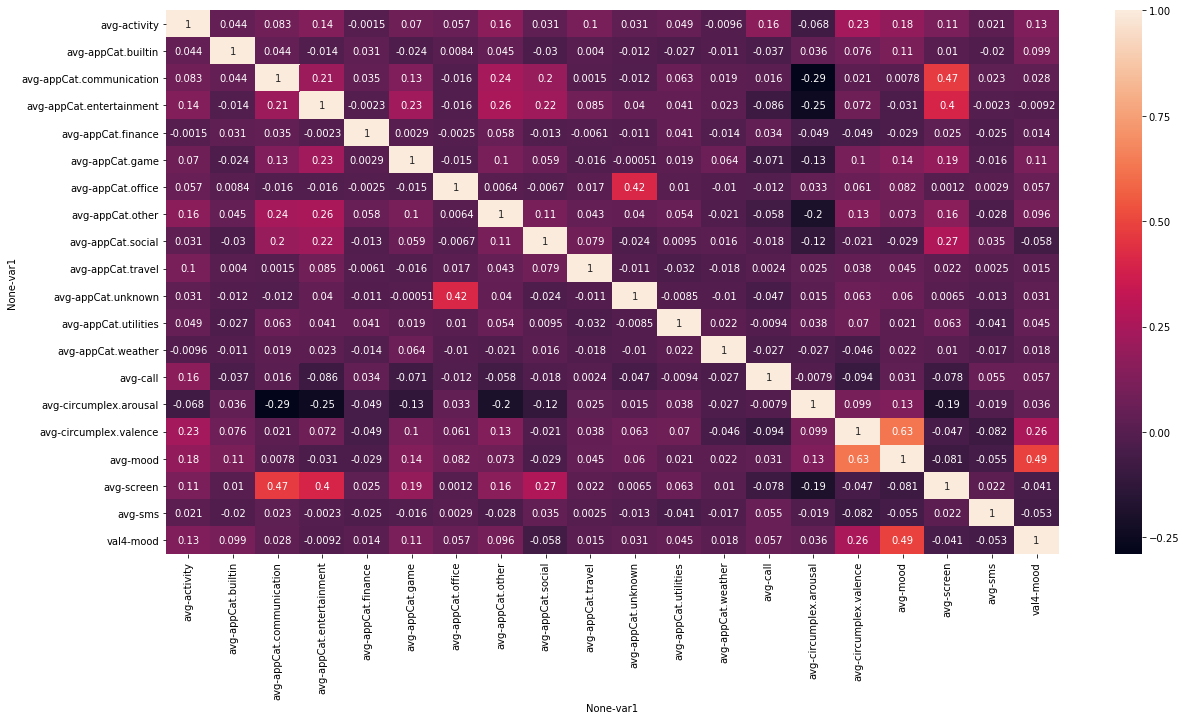

In [544]:
plt.figure(figsize=(20,10))
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_m, annot = True)

plt.show()

In [545]:
# features to use 

# mood day 1-3, target value t=4
# circumplex.valence 0.63 
# activity 0.18
# circumplex arousal 0.13 
# appcat.game 0.14 --- not usuable, only 81 rows of data
# appCat.builtin 0.11


# creating input/output instance matrices

In [765]:
# store each variable in a df, fill the NaNs with 0's and reset index
var1 = client_data[client_data['var1']== 'mood']
var2 = client_data[client_data['var1']== 'circumplex.valence']
var3 = client_data[client_data['var1']== 'activity']
var4 = client_data[client_data['var1']== 'circumplex.arousal']
var5 = client_data[client_data['var1']== 'appCat.builtin']

var1 = var1.fillna(0)
var2 = var2.fillna(0)
var3 = var3.fillna(0)
var4 = var4.fillna(0)
var5 = var5.fillna(0)

var2 = var2.reset_index(drop=True)
var3 = var3.reset_index(drop=True)
var4 = var4.reset_index(drop=True)
var5 = var5.reset_index(drop=True)

In [739]:
print(var1.shape) 
print(var2.shape) 
print(var3.shape)
print(var4.shape) 
print(var5.shape)

(1127, 11)
(1127, 11)
(1089, 11)
(1127, 11)
(1058, 11)


In [779]:
# merging on index first date and id, to store the data in the preferrred matrices
# merge=pd.merge(df,d, how='inner', left_index=True, right_index=True)
new_df = pd.merge(var1, var2,  how='left', left_on=['time1','id-1'], right_on = ['time1','id-1'])
new_df2 = pd.merge(var1, var3,  how='left', left_on=['time1','id-1'], right_on = ['time1','id-1'])
new_df3 = pd.merge(var1, var4,  how='left', left_on=['time1','id-1'], right_on = ['time1','id-1'])
new_df4 = pd.merge(var1, var5,  how='left', left_on=['time1','id-1'], right_on = ['time1','id-1'])

# var1 = var1.set_index('id-1')
# var2 = var2.set_index('id-1')

In [791]:
new_df.head(1)
# new_df.iloc[0][12]

,id-1,var1_x,time1,val1_x,time2_x,val2_x,time3_x,val3_x,time4_x,val4_x,avg_x,var1_y,val1_y,time2_y,val2_y,time3_y,val3_y,time4_y,val4_y,avg_y
0,AS14.01,mood,1900-03-21,6.2,1900-03-22,6.4,1900-03-23,6.8,1900-03-24,6.0,6.466667,circumplex.valence,0.2,1900-03-22,0.0,1900-03-23,0.8,1900-03-24,0.0,0.5


In [792]:
# per day for the same ID, store the numerical variable value in a matrix. every day new matrix. result is an array 
# matrices
matrix = []
time = [2,4,6]
val_mood = [3,5,7]
val_att = [12,14,16]

for index in range(len(new_df)):
    time_m = [new_df.loc[index][i] for i in time]
    var1_val = [new_df.loc[index][i1] for i1 in val_mood]
    
    var2_val = [new_df.loc[index][i1] for i1 in val_att]
    var3_val = [new_df2.loc[index][i1] for i1 in val_att]
    var4_val = [new_df3.loc[index][i1] for i1 in val_att]
    var5_val = [new_df4.loc[index][i1] for i1 in val_att]
#     var2_val = [var2.loc[index][i2] for i2 in val]
#     var3_val = [var4.loc[index][i3] for i3 in val]
    x = np.column_stack((time_m, var1_val, var2_val, var3_val,var4_val,var5_val))
    matrix.append(x)
    

In [ ]:
# output matrix
output = []
for index in range(len(var1)):
    output_val = [var1.loc[index][9]]
    output.append(output_val)

In [812]:
len(matrix)
len(output)

1127

In [820]:
#files output pickle
import pickle as pkl

with open('input.pkl','wb') as infile:
         pkl.dump(matrix, infile)
        
with open('output.pkl','wb') as outfile:
         pkl.dump(output, outfile)

        
with open('input.pkl','rb') as infile:
        input_pkl = pkl.load(infile)
with open('output.pkl','rb') as outfile:
        output_pkl = pkl.load(outfile)



In [819]:
len(input_pkl)
len(output_pkl)

1127